<a href="https://colab.research.google.com/github/ethandsz/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **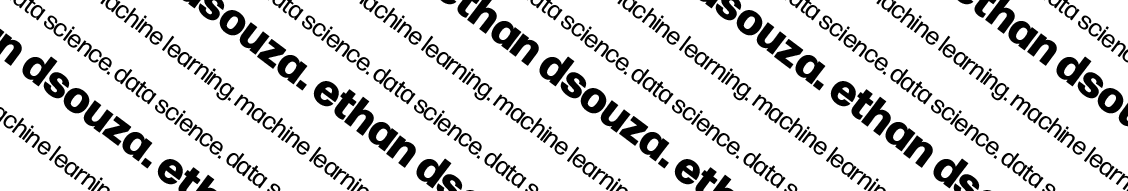News Headline Category Prediction**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Importing data, exploratory analysis, and setting target column(s) for training

In [ ]:
#raw = pd.read_excel('drive/MyDrive/Headline/Headlines.xlsx') 
raw = pd.read_excel('Downloads/Headlines.xlsx')

In [ ]:
raw

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


Dropping "Unnamed: 0" as it has no useful data

In [ ]:
raw.drop(columns="Unnamed: 0", inplace= True) 

Checking the number of categories and their names

In [ ]:
len(list(raw.category.unique()))

41

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
raw.describe()

C:\Users\Ethan\AppData\Local\Temp\ipykernel_6668\79165625.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw.describe()


,category,headline,authors,link,short_description,date
count,200853,200847,164233,200853,181121,200853
unique,41,199343,27992,200812,178332,2309
top,POLITICS,Sunday Roundup,Lee Moran,https://www.huffingtonpost.comhttp://stylelike...,Welcome to the HuffPost Rise Morning Newsbrief...,2013-04-24 00:00:00
freq,32739,90,2423,2,192,100
first,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-05-26 00:00:00


In [ ]:
raw.authors.unique().size

27993

In [ ]:
raw.authors.isna().sum()

36620

Dropping null/NaN values in the specified columns

In [ ]:
raw.dropna(subset = ['short_description', 'headline'], inplace = True) #Dropping all rows which contain Null/NaN values in the specified columns

Plot of the top 25 reported categories

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index[:25], y = raw.category.value_counts()[:25], labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Top 25 categories"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

In [ ]:
raw['date'] = pd.to_datetime(raw['date'])

In [ ]:
raw['year'] = raw['date'].dt.year

In [ ]:
plt.figure(figsize=(32,24));

fig = px.bar(x = raw.year.value_counts().index, y = raw.year.value_counts(), labels = {
    "x": "Year", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "*Year of publication*"); #Setting the title
fig.show(renderer="colab");

<Figure size 2304x1728 with 0 Axes>

# Combining Similar Categories

In [ ]:
raw.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [ ]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
raw.loc[raw['category'] == 'FIFTY'].sample(5)

,category,headline,authors,link,short_description,date,year
88010,FIFTY,Notes From a Dive Bar XI,"Alan Black, Contributorworks in a dive bar",https://www.huffingtonpost.com/entry/notes-from-a-dive-bar-xi_b_7617146.html,"Here's a resume. Male, 25-years old, friendly and popular with customers, knowledgeable in the arts of mixology, enthusiastic, responsible, and an asset for your business.",2015-06-18,2015
93427,FIFTY,Menopause and Moods,"Sheryl Kraft, ContributorFreelance Writer, www.sherylkraft.com, www.mysocalledmidlife.n...",https://www.huffingtonpost.com/entry/menopause-and-moods_b_7082212.html,"Once I started getting regular hot flashes, I realized that anxiety frequently went along with them. I'd feel anxious about the hot flashes themselves: what would trigger them, would they embarrass me; how long would they last, would they wake me up in the middle of the night?",2015-04-17,2015
81009,FIFTY,9 Rules Of Instagram That Were Made To Be Broken,"Jill Robbins, ContributorAward winning writer, speaker, humorist, mom, wine snob",https://www.huffingtonpost.com/entry/vogue-instagram-rules_b_8052200.html,My friend shared an article from Vogue online with me this week and I found it quite enlightening It wasn't about the latest crazy fashion trends but about a subject near and dear to my heart - social media.My heart sank a little bit when I read this article. I learned I have been breaking the rules of my beloved Instagram.,2015-09-05,2015
81647,FIFTY,The Hidden Perk Of Parenting That Has Nothing To Do With Your Kids,"Rachel Brehm, ContributorBlogging my way through life with twins (bloggymamma.com).",https://www.huffingtonpost.com/entry/parenting-friendships_b_8010016.html,"Since the birth of my twins, I have talked to more people, made more new friends, and generally experienced a more extroverted lifestyle than ever before. Never before babies would I have talked to strangers, initiated conversations with those I don't know, commiserated with literally anyone who would listen.",2015-08-29,2015
74035,FIFTY,What It's Really Like To Turn 83,"Stanley Ely, ContributorWriter",https://www.huffingtonpost.com/entry/turning-83_b_8570008.html,"Exactly three years ago, my uncle Morris passed away in Dallas at age 103 plus a few months. He never expected to live that long -- does anyone? But he did, and was alert until his very final days.\nThis happened just as I was giving myself an 80th birthday party in New York.",2015-11-22,2015


In [ ]:
raw.loc[raw['category'] == 'GREEN'].sample(5)

,category,headline,authors,link,short_description,date,year
23669,GREEN,One Of The Worldâ€™s Largest Icebergs Is About To Break Off Antarctica. Hereâ€™s What It Should Be Named.,"Aaron Packard, ContributorGlobal Climate Impacts coordinator for 350.org. Working with a...",https://www.huffingtonpost.com/entry/the-worlds-largest-iceberg-is-about-to-break-off-antarctica_us_594643e5e4b0940f84fe2f78,"The first feeling is a chilling awe, as you watch the British Antarctic Surveyâ€™s aerial footage of the great crack that is",2017-06-18,2017
69877,GREEN,New Index Attempts to Measure Excessive Resource Use,"Pro Journo, ContributorA global journalism incubator",https://www.huffingtonpost.com/entry/new-index-attempts-to-mea_b_8945640.html,There is a growing awareness among political decision-makers that we need to take action to accommodate the resource needs of a human population that is expected to exceed 9 billion by 2050. Yet that awareness still needs to translate into political action.,2016-01-09,2016
43465,GREEN,Historic Paris Climate Pact Takes Effect Today. Now What?,"By Valerie Volcovici, Reuters",https://www.huffingtonpost.com/entry/paris-climate-agreement_us_581c216ee4b0e80b02c91e13,â€œThis is a moment to celebrate. It is also a moment to look ahead with sober assessment and renewed will over the task ahead.â€,2016-11-04,2016
94089,GREEN,"BNSF Challenges Lawsuit From Engineer Who Ran For His Life From Exploding Oil ""Bomb Train""","Steve Horn, ContributorResearch Fellow, DeSmogBlog",https://www.huffingtonpost.com/entry/bnsf-challenges-lawsuit-f_b_7019960.html,"Burlington Northern Santa Fe (BNSF) has responded defensively to the oil-by-rail lawsuit filed by former BNSF locomotive engineer Bryan Thompson, a case recently reported on by DeSmogBlog.",2015-04-09,2015
20535,GREEN,Another Fox In The Henhouse: Coal Lobbyist Tapped For Top Spot In Trumpâ€™s EPA,"Mary Anne Hitt, ContributorDirector of the Sierra Club Beyond Coal Campaign",https://www.huffingtonpost.com/entry/another-fox-in-the-henhouse-coal-lobbyist-tapped-for_us_5978ec8ae4b09982b73761ab,"In a move that will probably surprise no one, but should dismay everyone who breathes air and drinks water, recent reports",2017-07-26,2017


In [ ]:
raw.loc[raw['category'] == 'QUEER VOICES'].sample(5)

,category,headline,authors,link,short_description,date,year
59012,QUEER VOICES,Caitlyn Jenner's Rep Slams Rumors Of The Star 'De-Transitioning',Curtis M. Wong,https://www.huffingtonpost.com/entry/caitlyn-jenner-de-transitioning_us_5734a500e4b060aa78198279,"A Kardashian biographer also claimed that Jenner was ""still into women.""",2016-05-12,2016
86235,QUEER VOICES,"Jonathan Groff On Being Gay In Hollywood, 'Looking' And Madonna's iPhone Diss",Curtis M. Wong,https://www.huffingtonpost.com/entry/jonathan-groff-gay-hollywood_us_559d57fde4b05b1d028f8511,"Joking that he knew he ""wouldn't be the male romantic lead in a Nicholas Sparks movie"" after coming out, Jonathan Groff nonetheless",2015-07-08,2015
81533,QUEER VOICES,Here's What Happened When Grindr Users Opened Up About Depression,James Michael Nichols,https://www.huffingtonpost.com/entry/heres-what-happened-when-grindr-users-opened-up-about-depression_us_55e0ab6fe4b0b7a96338e4a2,And other LGBT wellness stories from the past week.,2015-08-30,2015
27302,QUEER VOICES,Dear Donald Trump: The LGBT Community Is Not A Distraction,"Jennifer Morgan, ContributorJennifer Morgan is a writer and observer from Mississippi.",https://www.huffingtonpost.com/entry/dear-donald-trumpthe-lgbt-community-is-not-a-distraction_us_590fab4be4b046ea176aeca8,"Dear Donald Trump: On April 5th, 2016 Mississippiâ€™s Governor Phil Bryant signed into law the â€œPROTECTING FREEDOM OF CONSCIENCE",2017-05-07,2017
39015,QUEER VOICES,A Special Gift From My Grandmother,"Eric T. Shoen-Ukre, ContributorFundraiser, Blogger, Photographer",https://www.huffingtonpost.com/entry/a-special-gift-from-my-grandmother_us_585f1259e4b014e7c72edcf1,I don't have to leave David somewhere or make him hide when Grandma visits.,2016-12-25,2016


In [ ]:
raw.loc[raw['category'] == 'IMPACT'].sample(5)

,category,headline,authors,link,short_description,date,year
22824,IMPACT,40 Strangers. 50 Questions. One Video. Magic.,"Robert Greenwald, ContributorFounder and President, Brave New Films",https://www.huffingtonpost.com/entry/40-strangers-50-questions-one-video-magic_us_5953fd03e4b0c85b96c65ebc,"Kumbaya is not really in our vocabulary at Brave New Films. We are believers, not conciliators, not dealmakers. There is",2017-06-28,2017
129283,IMPACT,Why I Founded Zidisha,"Julia Kurnia, Contributor\nDirector, Zidisha",https://www.huffingtonpost.com/entry/why-i-founded-zidisha_us_5bb1bdd4e4b01857b70b4202,"An idealistic 24-year-old, I'd been hired out of graduate school to manage overseas grants on behalf of the US government. This was my second year on the job and I already had a reputation as a maverick.",2014-03-02,2014
113784,IMPACT,How A Small Wireless Handset Transformed My Classroom,"Madara PelnÄ“na, ContributorTeacher, IespÄ“jamÄ Misija (Mission Possible)",https://www.huffingtonpost.com/entry/how-a-small-wireless-hand_b_5678627.html,There is a school of thought that opposes technology in the classroom. This is rooted in the belief that it hinders or completely replaces human interaction.,2014-08-25,2014
188498,IMPACT,Healthy Birth Critical to Child Survival,"Craig E. Rubens, MD, PhD, Contributor\nExecutive Director, Global Alliance to Prevent Prematurity and...",https://www.huffingtonpost.com/entry/healthy-birth-critical_us_5bb194e5e4b01857b7085e2f,"Caring for newborns and young children is only half the battle. It is equally important that we study what happens during pregnancy, because safer and healthier pregnancies will put every child in a better position to live a long and healthy life.",2012-06-09,2012
147734,IMPACT,10 Donations You Haven't Considered,"Dylan Nord, Contributor\nPartner Relations, Social Media Manager, We-Care.com",https://www.huffingtonpost.com/entry/10-donations-you-havent-considered_us_5bb1b1f3e4b01857b70a2cda,"The Economist estimated that there are over 14 trillion frequent flyer miles left unclaimed, which could be worth as much",2013-08-18,2013


In [ ]:
raw.loc[raw['category'] == 'WELLNESS'].sample(5)

,category,headline,authors,link,short_description,date,year
152799,WELLNESS,Forgotten Dimension of Diabetes Revealed in DAWN2 Study,"Riva Greenberg, Contributor\nA leading expert on flourishing with diabetes and an internati...",https://www.huffingtonpost.com/entry/diabetes-support_us_5b9d4787e4b03a1dcc8641d5,"You can have access to better medicines and tools and yet do little because you haven't got the emotional strength, resilience and support to get up every day and manage this chronic condition.",2013-06-25,2013
193301,WELLNESS,The Benefits of Outdoor Exercise,"Stacy Berman, Contributor\nFit-preneur, creator of Stacy's Bootcamp and The Body Mind Pro...",https://www.huffingtonpost.com/entry/outdoor-exercise_us_5b9b9137e4b03a1dcc78b22d,"Spring is a perfect time to escape from the gym so you never have to sit on a sweaty machine again. Exercising outdoors is challenging, saves time, and studies are finding that it can actually make you feel better.",2012-04-18,2012
176670,WELLNESS,Laughing at Change,"Lorna Bright, Contributor\nfounder of The Cosmic Coalition for Modern Evolution",https://www.huffingtonpost.com/entry/laughter-health_us_5b9c6257e4b03a1dcc7e4217,"This year made me realize that I've accumulated a whole arsenal of wonderfully powerful tools and techniques that can help me through difficult times if I choose to use them. Things like prayer and faith, meditation and yoga, music, vitamins, love, persistence, honesty, communication, and trust.",2012-10-14,2012
183779,WELLNESS,How Firstborns and Secondborns Compare,"Heidi Grant Halvorson, Ph.D., Contributor\nAuthor, ""No One Understands You and What To Do About It"" ""Nine...",https://www.huffingtonpost.com/entry/birth-order_us_5b9c0f2be4b03a1dcc7c14f5,People have long been fascinated with birth order and how it shapes our lives; and recent research indicates that first- and secondborns do indeed see the world differently in ways that impact their motivation and likelihood of career and personal success.,2012-07-30,2012
169987,WELLNESS,"Exercise Anywhere, Anytime","Dr. Erica Miller, Contributor\nClinical Psychologist, Author",https://www.huffingtonpost.com/entry/exercise-tips_us_5b9ca6bfe4b03a1dcc8091ef,Muscles don't know if you're in a fancy gym or in your kitchen. These tips are designed for busy lives -- a minute here and a minute there add up.,2012-12-26,2012


In [ ]:
raw.loc[raw['category'] == 'FOOD & DRINK'].sample(5)

,category,headline,authors,link,short_description,date,year
132904,FOOD & DRINK,Sense of Taste: Coconut Mousse Cake (Recipe),"Ken Leung, Contributor\nFood Blogger",https://www.huffingtonpost.com/entry/sense-of-taste-coconut-mousse-cake_us_5b9dce5be4b03a1dcc8d2458,"I believe in selective indulgence. After enjoying your healthy lunch or dinner, you can end with a lighter dessert: coconut mousse cake. It has an airy, ethereal texture, so it's not nearly as heavy as typical treats.",2014-01-22,2014
132768,FOOD & DRINK,Annie Stein on Kai Lobach's Currywurst,"Lisa Dinsmore, Contributor\nContributor",https://www.huffingtonpost.com/entry/annie-stein-on-kai-lobach_us_5b9dd0eae4b03a1dcc8d3722,"Between tending the plants, cutting back the roses, cruising the art marts online and on foot, and catering parties from Bel Air to Malibu, who has time to toot his own horn about those yummy sausages?",2014-01-24,2014
191365,FOOD & DRINK,"Crazy Soda Flavors Taste Test: Buffalo Wing, Bacon, PB&J And More",Rachel Tepper,https://www.huffingtonpost.com/entry/buffalo-wing-soda_us_5b9bb1b8e4b03a1dcc79a432,"With everyone making such a fuss over the buffalo wing soda produced by The Rocket Fizz Soda Pop & Candy Shops, we decided",2012-05-09,2012
128212,FOOD & DRINK,Trash Fish: Guess Who's Coming to Dinner (VIDEO),"Rebecca Gerendasy, Contributor\nCo-founder, Cooking Up a Story",https://www.huffingtonpost.com/entry/trash-fish-guess-whos-com_us_5b9decbee4b03a1dcc8edd29,"Fueled by heightened consumer demand, the larger, more popular fish are being overfished.",2014-03-13,2014
179938,FOOD & DRINK,Creative Kids Foods: Recipes Your Kids Will Actually Want To Eat (PHOTOS),NaN,https://www.huffingtonpost.com/entry/kids-food_us_5b9c3fcde4b03a1dcc7d5a97,"Parents of picky eaters, we've found a remedy to ease your child's finicky ways. It's not hypnotism or anything serious. The",2012-09-10,2012


In [ ]:
raw.loc[raw['category'] == 'BUSINESS'].sample(5)

,category,headline,authors,link,short_description,date,year
88052,BUSINESS,What Game of Thrones Can Teach Us About Spa Retail Training,"Linda Harding-Bond, ContributorCreator of Increasing Your Retail Selling: An Online Class for...",https://www.huffingtonpost.com/entry/what-game-of-thrones-can-_b_7582558.html,"Changing the way your therapists deliver customer service at your spa through training is no easy task. Game of Thrones shows us that the road to success may be rife with drama but in the end for your customers, brand and team, it will be worth the journey.",2015-06-17,2015
125427,BUSINESS,How Wall Street's Life-Ruining Work Habits Hurt All Of Us,Jillian Berman,https://www.huffingtonpost.com/entry/banker-hours-study_us_5bb30aa2e4b0480ca6627b0d,"In her book, Schulte cites study after study showing that working extreme hours just for the sake of showing up is a habit",2014-04-13,2014
167750,BUSINESS,The Re-emergence of Europe: Why Exiting the Euro Is a Bad Idea,"Prof. Klaus Schwab, Contributor\nFounder and Executive Chairman of the World Economic Forum",https://www.huffingtonpost.com/entry/the-reemergence-of-europe_us_5bb2e49de4b0480ca65e23c3,"There is no legal framework for a member country to re-establish its own currency or for one member to expel another. Leaving would have far-reaching implications for a country's politics, finances, economy, society and future.",2013-01-19,2013
199484,BUSINESS,"Occupy Movement Regroups, Preparing for Its Next Phase",NaN,https://www.huffingtonpost.comhttp://www.nytimes.com/2012/02/12/us/occupy-movement-regroups-laying-plans-for-the-next-phase.html?pagewanted=1&hp,"The ragtag Occupy Wall Street encampments that sprang up in scores of cities last fall, thrusting â€œWe are the 99 percent",2012-02-12,2012
114961,BUSINESS,IMF May Be Right in Suggesting Countries Raise Fuel Taxes,"Jeffrey Rubin, ContributorFormer Chief Economist, CIBC World Markets",https://www.huffingtonpost.com/entry/imf-may-be-right-in-sugge_b_5672136.html,"It's tough to find any drivers who relish digging into their wallets to fill up at the pump. According to the International Monetary Fund, though, not only should fuel taxes jump by more than 50 percent, the increase should have Canadians whistling a happy tune. Now, here's the real kicker: The IMF is right.",2014-08-12,2014


In [ ]:
raw.loc[raw['category'] == 'MONEY'].sample(5)

,category,headline,authors,link,short_description,date,year
134321,MONEY,Will 2014 Be the Year?,"Richard Barrington, Contributor\nCFA, MoneyRates.com",https://www.huffingtonpost.com/entry/will-2014-be-the-year_us_5b9dc329e4b03a1dcc8c97f9,"However unlikely some developments may be, when nothing has happened yet, it is always possible to have high hopes for the new year. Here are several key questions about what economic developments 2014 will bring.",2014-01-07,2014
180498,MONEY,"Men Who Pay For Sex May Also Be Hoping To Find True Love, Study Finds",Meredith Bennett-Smith,https://www.huffingtonpost.com/entry/men-paying-for-sex-may-also-looking-true-love-study_us_5b9c3861e4b03a1dcc7d3382,"Authored by George Washington University sociology professor Ronald Weitzer and Los Angeles sexologist Christine Milrod, the",2012-09-04,2012
191492,MONEY,Bad News for Most Debt Collectors and Good News for Consumers,"Eric Yaverbaum, Contributor\nBest selling author (http://www.amazon.com/-/e/B001H6WCK2) Eri...",https://www.huffingtonpost.com/entry/bad-news-for-most-debt-collectors_us_5b9bae0be4b03a1dcc798d37,"Even with new regulations, Massachusetts and the rest of the nation still have a long way to go before we see more common sense than common criminals in the ranks of debt collectors and their accomplices.",2012-05-08,2012
187293,MONEY,George Washington's Constitution Sold For $9.8 Million,"Reuters, Reuters",https://www.huffingtonpost.com/entry/george-washingtons-constitution_us_5b9be6dee4b03a1dcc7b00d6,"An autographed manuscript of Lincoln's 1864 election victory speech sold for $3.4 million in February 2009, which set a record",2012-06-22,2012
180316,MONEY,Personal Shoppers: 10 Things They Don't Want You To Know,"SmartMoney, SmartMoney",https://www.huffingtonpost.com/entry/personal-shoppers-10-things_us_5b9c3cebe4b03a1dcc7d4ab9,"3. ""My only credential? A passion for fashion."" With its legions of self-styled experts, YouTube has lowered the barrier",2012-09-06,2012


In [ ]:
raw.loc[raw['category'] == 'PARENTS'].sample(5)

,category,headline,authors,link,short_description,date,year
85031,PARENTS,Dad Creates Epic Baby Nursery Of Every Mario Kart Fan's Dreams,Caroline Bologna,https://www.huffingtonpost.com/entry/mario-kart-nursery_us_55ae54ede4b07af29d565175,The finished product of Swain's hard work is a magical nursery that his 1-year-old son Grant loves -- and one that has,2015-07-22,2015
61547,PARENTS,Parents Of Triplets Compete To See Who Can Change The Diapers Fastest,Caroline Bologna,https://www.huffingtonpost.com/entry/parents-of-triplets-compete-to-see-who-can-change-the-diapers-fastest_us_570e72c4e4b03d8b7b9f0f03,This Mom vs. Dad competition is fierce.,2016-04-13,2016
40263,PARENTS,Some â€œDoâ€™sâ€ and â€œDonâ€™tsâ€ of Dealing with a Divorced Friend,"Holli Fawcett Clayton, ContributorFormer attorney, freelance writer, and creator of Courageous &...",https://www.huffingtonpost.com/entry/some-dos-and-donts-of-dealing-with-a-divorced_us_584b79a7e4b0151082221b79,"Divorce is not an infectious disease. Really, itâ€™s not contagious.",2016-12-10,2016
124909,PARENTS,Your Daily Guide to an Awesome Spring Break Staycation,"Common Sense Media, ContributorCommonsensemedia.org",https://www.huffingtonpost.com/entry/your-daily-guide-to-an-awesome-spring-break-staycation_b_5093295.html,"Let's face it: Not everyone can go to Bermuda for spring break. But sometimes a ""staycation"" is just what the doctor ordered, because you can hang out with the kids and tackle spring cleaning.",2014-04-18,2014
81787,PARENTS,Nearly 1 In 5 Children And Teens Are Obese,"Sara G. Miller, Live Science",https://www.huffingtonpost.com/entry/nearly-1-in-5-children-and-teens-are-obese_us_55df182ee4b029b3f1b1b61b,"More than one-third of American adults are obese, and now, a new report shows thatÂ childrenÂ and teens aren't far behind. The",2015-08-27,2015


In [ ]:
raw.loc[raw['category'] == 'PARENTING'].sample(5)

,category,headline,authors,link,short_description,date,year
158842,PARENTING,Cambridge Strong: Tips for Students Returning After Bombs and Lockdowns,"Nancy Rappaport, Contributor\nAssociate professor of psychiatry, Harvard Medical School",https://www.huffingtonpost.com/entry/cambridge-is-golden-tips_us_5b9d10f7e4b03a1dcc843c5e,"Students in Massachusetts were on spring break last week, so when they resume their routine tomorrow, we need to assess the impact of the tragedy and create a plan that restores a sense of security.",2013-04-22,2013
157675,PARENTING,Growing as a Mom Through Networking,"Robin Gorman Newman, Contributor\nAuthor, Theatre Producer, Mom, Marketer, Bird Lover",https://www.huffingtonpost.com/entry/growing-as-a-mom-through_us_5b9d2014e4b03a1dcc84ae63,"I don't frequent networking functions... or at least not since I became a mom. Time doesn't always permit in the life of a work-at-home, multi-tasking mother of a child in elementary school.",2013-05-04,2013
166571,PARENTING,School Time Is Money: Are More Hours Worth the Cost?,"Patte Barth, Contributor\nDirector, Center for Public Education",https://www.huffingtonpost.com/entry/longer-school-days_us_5b9cc557e4b03a1dcc81b634,"Adding days and hours to the schedule is relatively easy, but it's definitely not cheap. If students gained a lot by being in school longer the extra costs may be worth it. But do they?",2013-01-31,2013
149902,PARENTING,Voices and Choices: The Secrets to Summer Reading and Writing Success,"Pam Allyn, Contributor\nFounder & Executive Director, LitWorld",https://www.huffingtonpost.com/entry/voices-and-choices-the-secrets-to-summer-reading_us_5b9d60b1e4b03a1dcc873bbd,"Summer is an ideal time to empower children to master control of their reading lives. By supplementing the reading lists that are sent home with time for the child to match his passions to his reading, we give a child the sense that he is curating his own reading life.",2013-07-26,2013
136732,PARENTING,Smoochgate: A Lesson Lost,"Kimann Schultz, Contributor\narts & free speech advocate, writer illustrator",https://www.huffingtonpost.com/entry/smoochgate-a-lesson-lost_us_5b9db714e4b03a1dcc8be575,"I am raising a daughter who will soon be 10. And I am raising her to believe -- and this is supported by school policy -- that she has an unequivocal right to never be touched/accosted in any way, shape or form that she does want or permit.",2013-12-12,2013


In [ ]:
raw.loc[raw['category'] == 'TASTE'].sample(5)

,category,headline,authors,link,short_description,date,year
84779,TASTE,"This Dragon Is Carved Out Of A Watermelon, And It's INTENSE",Jamie Feldman,https://www.huffingtonpost.com/entry/this-dragon-carved-out-of-watermelon-is-hot_us_55b2765de4b0224d88321a2d,"Well, this certainly puts your vodka-soaked watermelonÂ trick to shame. Valeriano Fatica, whose Facebook bioÂ describes him",2015-07-24,2015
12971,TASTE,All The Places Where You Can Get Free Food On Halloween,Suzy Strutner,https://www.huffingtonpost.com/entry/free-food-on-halloween_us_59f75b8ee4b0c0c8e67b43c4,Yum! ðŸ‘»,2017-10-30,2017
14544,TASTE,Anthony Bourdain Slams Critics Who Say Chefs Shouldn't Talk Politics,Carly Ledbetter,https://www.huffingtonpost.com/entry/anthony-bourdain-has-harsh-words-for-critics-who-dont-want-to-hear-his-political-views_us_59db980fe4b0b34afa5b14ca,"""F**k that.""",2017-10-09,2017
64845,TASTE,Single Malt Scotch Prices Are Skyrocketing As Global Supply Runs Out,James Cave,https://www.huffingtonpost.com/entry/scotch-shortage-prices_us_56da0578e4b0ffe6f8e9886d,Here's what that means for you.,2016-03-05,2016
13367,TASTE,10 Kitchen Tools You Need For Thanksgiving,Brittany Nims,https://www.huffingtonpost.com/entry/kitchen-tools-for-thanksgiving_us_59f0ad79e4b0e064db7e3e15,"From bird to pie, we've got you covered.",2017-10-25,2017


In [ ]:
raw.loc[raw['category'] == 'MEDIA'].sample(5)

,category,headline,authors,link,short_description,date,year
70816,MEDIA,Small Town Paper Has Opening For 'Reporter Who Reads',Chris D'Angelo,https://www.huffingtonpost.com/entry/small-town-paper-has-opening-for-reporter-who-reads_us_56819e15e4b014efe0d8f4c8,"""So many kids you hire these days don't read anything.""",2015-12-29,2015
47847,MEDIA,Sean Hannity Threatens To Sue CNN For Slander,Alana Horowitz Satlin,https://www.huffingtonpost.com/entry/sean-hannity-sue-cnn_us_57dba6fae4b0071a6e066f32,He doesn't have much of a case.,2016-09-16,2016
55800,MEDIA,Silver Bells: Moving On From The Workplace I Loved,"Pete Wilgoren, ContributorEmmy winning journalist, blogger, & author",https://www.huffingtonpost.com/entry/silver-bells-moving-on-fr_b_10533374.html,"The final chapter in my career with the company arrived unceremoniously in four very average cardboard boxes. The belongings were well cared for and meticulously cataloged on labels but I really didn't want to look. After sixteen years with the company, I knew what the boxes contained.",2016-06-18,2016
75602,MEDIA,95 Percent Of GOP Ad Dollars Comes From Outside Groups,NaN,https://www.huffingtonpost.comhttp://www.nbcnews.com/meet-the-press/super-pacs-outside-groups-dominate-gop-16-ad-spending-n457351,A whopping 95 percent of the TV ad spending in the Republican presidential race has come from outside groups and Super PACs,2015-11-04,2015
103729,MEDIA,Looking Back at 9 Years of The Colbert Report (VIDEO),"Arianna Huffington, Contributor",https://www.huffingtonpost.com/entry/looking-back-at-9-years-of-the-colbert-report_b_6350384.html,"Today, as The Colbert Report airs its final episode, I'm looking back with gratitude on nine years of great television. I loved being on the show several times, discussing everything from my Greek accent to self-sabotage to the obnoxious roommate living in my head. Here are some of my favorite moments on The Colbert Report over the years.",2014-12-18,2014


In [ ]:
raw.loc[raw['category'] == 'WORLDPOST'].sample(5)

,category,headline,authors,link,short_description,date,year
97130,WORLDPOST,The Ebola Plague: African Heroes and Martyrs,"Kwei Quartey, ContributorForeign Policy In Focus columnist, author",https://www.huffingtonpost.com/entry/the-ebola-plague-african-heroes-and-martyrs_b_6131010.html,"During the height of the Ebola panic, nurse Kacie Hickox, who cared for Ebola victims in Sierra Leone, was forcibly quarantined in New Jersey on her return to the United States. Said a friend and former classmate, ""She's really concerned about her colleagues coming back to the U.S. after her.""",2015-03-04,2015
104191,WORLDPOST,Government and Fans Battle in Court and on the Pitch in Egypt and Turkey,"James Dorsey, ContributorSenior fellow, S. Rajaratnam School of International Studies",https://www.huffingtonpost.com/entry/government-and-fans-battle-in-court_b_6318910.html,"In Turkey, the government has sought to drive a wedge between militant fans and other supporters by arguing that e-ticketing was a way to combat illegal ticket scalping, increase tax revenues and ensure that stadia are safe for families.",2014-12-13,2014
117012,WORLDPOST,MH17 And The Long Term Costs Of Russia's Ukraine Incursion,"Mark Galeotti, ContributorProfessor of Global Affairs at NYUâ€™s Center for Global Affairs...",https://www.huffingtonpost.com/entry/putin-russia-mh17-crash_b_5604193.html,"Courtesy of Malaysia Airlines Flight 17, Putin is now coming to terms with the blowback from his Ukrainian adventure, a hybrid non-linear political-military campaign fought largely through local proxies, and this is something that will dog him for as long as he is in power.",2014-07-20,2014
74113,WORLDPOST,"As Islamist Terrorism Increases, Some Respond...By Assailing Israel","David Harris, ContributorAJC Chief Executive Officer, Edward and Sandra Meyer Office of...",https://www.huffingtonpost.com/entry/as-islamist-terrorism-inc_b_8618712.html,"For the Swedish foreign minister and, it appears, too many EU nations, the path of least political resistance is to focus obsessively on Israel, irrespective of what else might be going on in the world.",2015-11-21,2015
91897,WORLDPOST,"Dear Ben Affleck: My Ancestors Were Slave Owners, Too. Here's What We Can Do About It.","Thomas Norman DeWolf, ContributorExecutive director, Coming to the Table; Author, Inheriting th...",https://www.huffingtonpost.com/entry/ben-affleck-slave-owners_b_7200510.html,I'm sure you want this whole episode behind you. I get that: I'm related to the most successful transatlantic slave-trading dynasty in U.S. history.,2015-05-04,2015


In [ ]:
raw.loc[raw['category'] == 'THE WORLDPOST'].sample(5)

,category,headline,authors,link,short_description,date,year
26783,THE WORLDPOST,"U.S., China Agree To First Trade Steps Under 100-Day Plan","Ayesha Rascoe and Michael Martina, Reuters",https://www.huffingtonpost.com/entry/trump-china-trade_us_59160883e4b0031e737d930b,â€œThis will help us to bring down the deficit for sure.â€,2017-05-12,2017
45611,THE WORLDPOST,France Opens Its First Supervised Injection Site For Drug Users,NaN,https://www.huffingtonpost.com/entry/france-supervised-injection-site_us_57fce36ee4b0b6a43035681c,The new center will allows drug users to inject with clean syringes and under supervision.,2016-10-11,2016
41346,THE WORLDPOST,Africa Is Not Conflicted About Fidel Castroâ€™s Legacy,"Lynsey Chutel, Quartz",https://www.huffingtonpost.com/entry/africa-is-not-conflicted-about-fidel-castros-legacy_us_583c8161e4b03c83311d8d4a,It was perhaps Cubaâ€™s willingness to fight side-by-side with Africans that made him such a towering figure on the continent,2016-11-28,2016
53571,THE WORLDPOST,"Hundreds Abducted And Tortured By Egyptian Security Forces, Amnesty Reports","Amina Ismail, Reuters",https://www.huffingtonpost.com/entry/egypt-torture-abduct-dissent_us_57866044e4b08608d332735f,"An average of three or four people disappear every day, according to the human rights group.",2016-07-13,2016
41343,THE WORLDPOST,"Iraqi Forces Say They've Killed Almost 1,000 Islamic State Fighters In Mosul","Patrick Markey and Ulf Laessing, Reuters",https://www.huffingtonpost.com/entry/iraqi-forces-kill-1000-islamic-state-mosul_us_583c25c7e4b09b60560110d1,And they've captured almost half of the eastern part of the city.,2016-11-28,2016


In [ ]:
raw.loc[raw['category'] == 'GOOD NEWS'].sample(5)

,category,headline,authors,link,short_description,date,year
70011,GOOD NEWS,"Viral Photo Captures Incredible Moment Between Police Officer, Homeless Man",Kimberly Yam,https://www.huffingtonpost.com/entry/deputy-brings-homeless-man-he-saw-on-side-of-highway-to-mcdonalds-so-hed-be-warm_us_568d5698e4b0a2b6fb6e4265,"""All it takes is a simple act of kindness to change someone's day, and possibly life.""",2016-01-07,2016
113873,GOOD NEWS,A Dog Day Afternoon,"Ben Purdy, ContributorOccasional writer, full-time human",https://www.huffingtonpost.com/entry/a-dog-day-afternoon_b_5703338.html,"With the constant stream of horrible (although important) news stories out there right now, I would like to share a story about a small community of strangers coming together for a good cause.",2014-08-24,2014
49222,GOOD NEWS,College Football Player Spots Boy Sitting Alone At Lunch And Joins Him,Nina Golgowski,https://www.huffingtonpost.com/entry/this-college-football-players-heartwarming-act-left-a-mom-in-tears_us_57c6ce26e4b0e60d31dc3a5a,"â€œThis is one day I didnâ€™t have to worry if my sweet boy ate lunch alone,"" the child's overjoyed mom said.",2016-08-31,2016
75401,GOOD NEWS,This Boy Has Outsmarted Us All With His Perfect Math Problem Answer,Kimberly Yam,https://www.huffingtonpost.com/entry/boy-funny-math-answer_us_563bba84e4b0411d30702903,This is everything.,2015-11-06,2015
80574,GOOD NEWS,Clap Your Flippers For Hawaii Hospital That Rescued 2 Endangered Seal Pups,Chris D'Angelo,https://www.huffingtonpost.com/entry/hawaiian-monk-seal-hospital_us_55f07f86e4b093be51bd33b9,"""Each individual counts when you only have 1,100 animals.""",2015-09-10,2015


In [ ]:
raw.loc[raw['category'] == 'WEDDINGS'].sample(5)

,category,headline,authors,link,short_description,date,year
151528,WEDDINGS,Golden Gate Bridge Proposal: San Francisco Man Pops The Question From Top Of Bridge,NaN,https://www.huffingtonpost.com/entry/golden-gate-bridge-proposal_us_5b9d54dce4b03a1dcc86bb4f,"""Jordan immediately began crying when I got down on one knee,"" Gonzales said. ""We had been together for five years and she",2013-07-09,2013
158214,WEDDINGS,Real Weddings: Couples Who Got Married This Weekend,NaN,https://www.huffingtonpost.com/entry/real-weddings-couples-who_us_5b9d1bede4b03a1dcc84861d,Our readers who tied the knot this weekend took their Big Day celebrations all around the globe -- from stateside weddings,2013-04-29,2013
139560,WEDDINGS,Marrying an Entrepreneur,"Lauren Van Horn, Contributor\nStrategic Partnerships at Facebook; Co-founder of Bushakan",https://www.huffingtonpost.com/entry/marrying-an-entrepreneur_us_5b9da857e4b03a1dcc8af002,"This week my husband announced that he is leaving Path to start his own company with a close friend and co-worker. In Silicon Valley, an announcement like this is expected, the norm, no big deal. The thing is, it is terrifying to me.",2013-11-12,2013
137139,WEDDINGS,10 Tips For The DIY Bride (and Groom),"Jill Bieker, Contributor\nBlogger",https://www.huffingtonpost.com/entry/10-tips-for-the-diy-bride_us_5b9dac78e4b03a1dcc8b3eb4,"We ended up having everything we wanted and more, while coming in way, way under budget. Here are our tips for planning your DIY day, from the ground up.",2013-12-07,2013
127258,WEDDINGS,How to Make Marriage Work for 64 Years,"Anthony Silard, Contributor\nCEO, The Global Leadership Institute",https://www.huffingtonpost.com/entry/how-to-make-marriage-work_us_5b9df12fe4b03a1dcc8f3370,"As you think about how to create a life filled with stable, long-term intimacy, remember that the most important thing in",2014-03-24,2014


In [ ]:
raw.loc[raw['category'] == 'WOMEN'].sample(5)

,category,headline,authors,link,short_description,date,year
122650,WOMEN,Should Women Apologize for Abortion?,"Dennis Trainor, ContributorCreator of Acronym TV/ Director- American Autumn: an Occudoc",https://www.huffingtonpost.com/entry/should-women-apologize-for-abortion_b_5334828.html,"In the United Sates, one out of every three women has had an abortion. If you are a women living in Texas and a growing number of states, access to this basic, simple and safe procedure has been severely restricted.",2014-05-16,2014
58633,WOMEN,Crossing The Line: How Donald Trump Behaved With Women In Private,NaN,https://www.huffingtonpost.comhttp://www.nytimes.com/2016/05/15/us/politics/donald-trump-women.html,Donald J. Trump had barely met Rowanne Brewer Lane when he asked her to change out of her clothes.,2016-05-16,2016
50416,WOMEN,"'Inside Amy Schumer' Writer Goes On Lengthy, Victim-Blaming Rant",Alanna Vagianos,https://www.huffingtonpost.com/entry/inside-amy-schumer-writer-goes-on-lengthy-victim-blaming-rant_us_57b4b79ce4b095b2f5421f52,"â€œI am so saddened and disappointed,"" tweeted Schumer.",2016-08-17,2016
117033,WOMEN,Every Woman Has a Bikini Body,"Tony Posnanski, ContributorWriter",https://www.huffingtonpost.com/entry/every-woman-has-a-bikini-body_b_5154818.html,"The media makes it out to be a myth. A goal for every summer. No one truly has the bikini body that fitness/health publications talk about because it is not real. It is fictional. Yet, they give you just a few easy steps to get the body ""they"" want... not the one you want.",2014-07-19,2014
107035,WOMEN,How My Single Mom Made Me A Male Feminist,"TueNight, ContributorStories From Life's Middle. Every Tuesday.",https://www.huffingtonpost.com/entry/i-learned-to-be-a-feminist-my-single-mom_b_6117444.html,"I used to think that my mom made her stand when I was seven in order to teach me to be a gentleman, a concept laden with the trappings of chivalry, often landing at odds with the equality demanded by feminism. Now I realize that she was actually teaching me that it was my job to show respect, keep my head up and look at the world through the lens of others.",2014-11-10,2014


In [ ]:
raw.loc[raw['category'] == 'HOME & LIVING'].sample(5)

,category,headline,authors,link,short_description,date,year
152595,HOME & LIVING,"Celebrities With Green Homes: Jessica Alba, Lisa Ling and Four Other A-Listers With Eco-Friendly Houses (PHOTOS)",Shana Ecker,https://www.huffingtonpost.com/entry/celebrities-green-homes_us_5b9d4d8be4b03a1dcc867203,"Though we're not sure a 22,000-square-foot mansion would ever be approved by Mother Earth.",2013-06-27,2013
199384,HOME & LIVING,How to Lay Paver Patio,"Eric Stromer, Contributor\nHost, Over Your Head",https://www.huffingtonpost.com/entry/how-to-lay-paver-patio_us_5b9b5289e4b03a1dcc769cfe,"Installing a pavers patio is a great, durable way to create a walkway through your garden.",2012-02-13,2012
171438,HOME & LIVING,Holiday Checklist: Everything You Need To Celebrate Christmas,Shana Ecker,https://www.huffingtonpost.com/entry/holiday-checklist-christmas_us_5b9c9a8de4b03a1dcc803914,Everything youâ€™ll need to be the ultimate hostess.,2012-12-10,2012
165349,HOME & LIVING,How to Host a Brunch for Your Sweeties,"GalTime, Contributor\nContributor",https://www.huffingtonpost.com/entry/valentines-day-brunch-tips_us_5b9cd271e4b03a1dcc8222ce,Valentine's Day doesn't necessarily mean a table for two! The holiday can be even sweeter when toasting to the relationships that last us all year with a group of friends.,2013-02-13,2013
136114,HOME & LIVING,Stunning NYC Apartment 'Mansion' Used To Be A Vacant Parking Lot (PHOTOS),NaN,https://www.huffingtonpost.com/entry/nyc-apartment-mansion_us_5b9db8d5e4b03a1dcc8c0559,"** Enter the visionaries at design firm SFA Design, who stepped in to overhaul the 29,702 square-foot space that most recently",2013-12-18,2013


In [ ]:
raw.loc[raw['category'] == 'TRAVEL'].sample(5)

,category,headline,authors,link,short_description,date,year
168634,TRAVEL,First Choice Seeks Official Slide Tester At SplashWorld Water Parks,NaN,https://www.huffingtonpost.com/entry/first-choice-slide-tester-splashworld_us_5b9cb493e4b03a1dcc810e0d,"Now that he is leaving the position for another job, his successor will rate the rides across First Choice's 20 properties",2013-01-10,2013
153506,TRAVEL,Trend Watch: The Rise of Immersive Role-Play Games,"MiniTime, Contributor\nMiniTime is the first family travel site with personalized rec...",https://www.huffingtonpost.com/entry/trend-watch-the-rise-of-i_us_5b9d4501e4b03a1dcc862558,"Taking a cue from the enormous popularity of video games, top family travel destinations are offering high-tech interactive gaming experiences that immerse visitors in a storyline. Here are four places your family can experience this growing trend and get in on the game.",2013-06-18,2013
186971,TRAVEL,"100 Days: A Summer Of Travel, Writing And Learning","Kay Rodriguez, Contributor\nEditor-In-Chief of The Kay Days",https://www.huffingtonpost.com/entry/100-days-a-summer-of-trav_us_5b9bdf37e4b03a1dcc7ae162,"I didn't want my nerves to distract me from my experiences abroad, so on a whim, I bought myself a journal and challenged myself to write, every day, for the next 100 days. Writing every day will help me to capture moments during my travels that I hope to remember for years to come -- little happenings that make a world of difference.",2012-06-25,2012
178855,TRAVEL,Supermodel Maggie Rizer Claims United Airlines Killed Her Dog,Cavan Sieczkowski,https://www.huffingtonpost.com/entry/supermodel-maggie-rizer-united-airlines-killed-her-dog-bea-golden-retriever_us_5b9c51b0e4b03a1dcc7dc83f,"United Airlines did not respond to Rizer's claim that the airline had ""called our veterinarian and fabricated a story about",2012-09-21,2012
195519,TRAVEL,Rick Steve's Road Trip: Atlanta's Naked Dogs And Peach Trees,"Rick Steves, Contributor\nContributor",https://www.huffingtonpost.com/entry/atlanta-naked-dogs-and-pe_us_5b9b7d10e4b03a1dcc780447,"Atlanta is clearly the Manhattan of the South. It's CNN slick, Coca-Cola fueled and funded and thriving. Still, I'm not awarding creativity points: 52 streets have ""Peach Tree"" in their names.",2012-03-26,2012


In [ ]:
raw.loc[raw['category'] == 'STYLE & BEAUTY'].sample(5)

,category,headline,authors,link,short_description,date,year
179029,STYLE & BEAUTY,I Lost Weight in 2 Weeks by Giving Up Eating Everything White,"Vicky Tiel, Contributor\nDesigner/Author",https://www.huffingtonpost.com/entry/weight-loss_us_5b9c27dbe4b03a1dcc7cb11a,I must tell all you ladies how I lost 10 pounds in two weeks by giving up eating everything white! Here is how it happened.,2012-09-19,2012
193747,STYLE & BEAUTY,Platform Heels For Spring: Our Blogger Network Styles The Trend (PHOTOS),Sarah St. Lifer,https://www.huffingtonpost.com/entry/platform-shoes_us_5b9b90ffe4b03a1dcc78ab28,"Kate Moss once said, ""If I'm going dancing, then I wear the highest heels with the shortest dress,"" and while I agree with",2012-04-13,2012
149966,STYLE & BEAUTY,Rita Marley's Regal Head Wraps (PHOTOS),Dana Oliver,https://www.huffingtonpost.com/entry/rita-marley-head-wraps-photos_us_5b9d6128e4b03a1dcc874684,"Remembering Bob Marley: Rita Marley may live in the shadow of her late husband Bob Marley's musical legacy, but she's no",2013-07-25,2013
191656,STYLE & BEAUTY,Kentucky Derby 2012: Hats & Champagne Galore! (PHOTOS),NaN,https://www.huffingtonpost.com/entry/kentucky-derby-2012-hats_us_5b9babbce4b03a1dcc797e49,"Mixed into the champagne-sipping, horse-cheering fans were several behatted celebrities, including Debra Messing, Tinsley",2012-05-06,2012
195478,STYLE & BEAUTY,"Bethenny Frankel: Mother, SkinnyGirl Mogul, Skin Care Expert?",Brooke Bobb,https://www.huffingtonpost.com/entry/bethenny-frankel-skinny-girl_us_5b9b7dd0e4b03a1dcc780ab2,"And on a non-mom note, what to do the morning after a few too many (SkinnyGirl) margaritas? Bethenny told us that she likes",2012-03-26,2012


In [ ]:
raw.loc[raw['category'] == 'IMPACT'].sample(5)

,category,headline,authors,link,short_description,date,year
131325,IMPACT,A Florida County Spent Over $5 Million Jailing Homeless People. It Could've Spent Less On Shelter,Eleanor Goldberg,https://www.huffingtonpost.com/entry/housing-homeless-people-costs_us_5bb1bbcfe4b01857b70b2562,"""We set about this challenge ... with a united purpose, and, as a result, Phoenix can take its place as role model city for",2014-02-08,2014
17739,IMPACT,Houston Businessman Turns His Furniture Stores Into Storm Shelters,Nina Golgowski,https://www.huffingtonpost.com/entry/furniture-stores-turned-into-shelters_us_59a57622e4b0446b3b867b49,The owner of Gallery Furniture says he's welcomed 400 Texans with hot food and a place to rest.,2017-08-29,2017
104517,IMPACT,Hope Lives Here: Art and Nature Breathe New Life Into Downtown Kingston,"Kirk-Anthony Hamilton, ContributorEntrepreneur and investor",https://www.huffingtonpost.com/entry/hope-lives-here_b_6269476.html,"Fleet Street is now an oasis in a place, which would otherwise seem desolate. Inspiration lies in the simplicity of this beautiful concept. It is hoped that the projects will continue to progress to other at-risk communities -- continuing to break down barriers while transforming lives.",2014-12-09,2014
138084,IMPACT,How-To Use Ambiguity to Pioneer Change,"Jonathan C. Lewis, Contributor\nAuthor, The Unfinished Social Entreprenuer",https://www.huffingtonpost.com/entry/howto-use-ambiguity-to-pi_us_5bb1b81ee4b01857b70ad648,"Your commitment to social change is not a function of where you work, but of what you believe in. With a little bit of creativity",2013-11-28,2013
12008,IMPACT,Trump And Transforming Capitalism: Making Our Movement See Itself,"Otto Scharmer, ContributorSenior Lecturer, MIT; Co-founder u.lab and Presencing Institute",https://www.huffingtonpost.com/entry/trump-and-transforming-capitalism-making-our-movement_us_5a06ef9ce4b0f1dc729a6b39,â€œTrump is Americaâ€™s wake-up callâ€ I heard a visitor to the United States say the other day. True. Trumpâ€™s first year has,2017-11-11,2017


In [ ]:
raw.loc[raw['category'] == 'SCIENCE'].sample(5)

,category,headline,authors,link,short_description,date,year
173545,SCIENCE,The Voyager 1 Space Probe and the Generations of Scientists Who Care For It,"J.S. McDougall, Contributor\nHusband. Father. Farmer. Author.",https://www.huffingtonpost.com/entry/voyager-1_us_5baeb2f9e4b014374e2deeae,"The question of when Voyager 1 will leave the solar system is exciting, but generally not important. The fact is that it will soon, or already has -- and therefore it has moved the human race into a new chapter of humanity as interstellar beings.",2012-11-17,2012
137766,SCIENCE,'Immunize' Yourself Against Bad Moods? New Research Suggests It May Be Possible,Jacqueline Howard,https://www.huffingtonpost.com/entry/bad-moods-immunity_us_5baebc8be4b014374e2eb0c9,"""A bad mood is known to slow cognition,"" study co-author Dr. Shay Ben-Haim, a researcher at the university, said in a written",2013-12-01,2013
189073,SCIENCE,"Space Shuttle 'Enterprise,' Shuttle Replica 'Explorer' Move In NYC And Houston Sunday, June 3",NaN,https://www.huffingtonpost.com/entry/space-shuttles-enterprise_us_5baeae6ce4b014374e2d98a7,NASA's Space Shuttle Museum Flights: Complete Coverage Final Flight: Space Shuttle Enterprise Over NYC | Video Photos: Space,2012-06-03,2012
83237,SCIENCE,"Testosterone Therapy Isn't All It's Cracked Up To Be, Study Finds",Joe Satran,https://www.huffingtonpost.com/entry/study-finds-testosterone-neither-as-risky-nor-useful-as-hyped_us_55c923c7e4b0923c12bdf3e4,"""It's too early to put this stuff in the water supply,"" one researcher says.",2015-08-11,2015
49552,SCIENCE,6 Scientists Just Spent A Year On Simulated Mars. Here's What They Learned.,Chris D'Angelo,https://www.huffingtonpost.com/entry/year-on-mars-hawaii-hiseas_us_57bf7086e4b04193420e7b6e,"The crew ""returns to Earth"" Sunday after 365 days in isolation.",2016-08-27,2016


In [ ]:
raw.loc[raw['category'] == 'ARTS & CULTURE'].sample(5)

,category,headline,authors,link,short_description,date,year
29635,ARTS & CULTURE,Colson Whitehead's 'The Underground Railroad' Wins Pulitzer Prize,Claire Fallon,https://www.huffingtonpost.com/entry/colson-whiteheads-the-underground-railroad-wins-pulitzer-prize_us_58ebcd65e4b0ca64d91820fd,Other winners include playwright Lynn Nottage and theater critic Hilton Als.,2017-04-10,2017
58716,ARTS & CULTURE,"'Under The Gun' Examines Both Sides Of The Gun-Control Debate, Even If It Will Only Appeal To One",Matthew Jacobs,https://www.huffingtonpost.com/entry/under-the-gun-documentary_us_57361490e4b060aa781a38ac,The Katie Couric-produced documentary premieres on Epix.,2016-05-15,2016
41277,ARTS & CULTURE,Pussy Riot To Perform In 'Political Happening' During Art Basel Miami Beach,Priscilla Frank,https://www.huffingtonpost.com/entry/pussy-riot-art-basel-miami-beach_us_583d8418e4b0860d611658ac,The exclusive event is invitation-only.,2016-11-29,2016
48198,ARTS & CULTURE,"Ladies, Yoko Ono Wants You To Participate In Her Next Artwork",Priscilla Frank,https://www.huffingtonpost.com/entry/yoko-ono-arising-artwork-feminism_us_57d6b0efe4b06a74c9f57fb3,This is not a drill.,2016-09-12,2016
18250,ARTS & CULTURE,A Sci-Fi Magazine Created Entirely By Writers And Editors With Disabilities Is Coming,Priscilla Frank,https://www.huffingtonpost.com/entry/destroy-science-fiction-disability_us_59949b80e4b0d0d2cc83cec3,"Prepare yourself for ""Disabled People Destroy Science Fiction.""",2017-08-23,2017


In [ ]:
raw.loc[raw['category'] == 'CRIME'].sample(5)

,category,headline,authors,link,short_description,date,year
79693,CRIME,Peanut Exec Faces Life Sentence For Shipping Tainted Peanut Butter,"Russ Bynum, Associated Press",https://www.huffingtonpost.com/entry/peanut-executive-stewart-parnell-life-sentence-salmonella_us_55fee6b3e4b08820d9190241,He's been blamed for a salmonella outbreak that killed 9 people and left hundreds more ill.,2015-09-20,2015
159053,CRIME,Boston Manhunt: Watertown Police Chief Details How Suspect Was Captured (VIDEO),NaN,https://www.huffingtonpost.com/entry/boston-manhunt-details-police-chief-account_us_5ba2b23ae4b0c2784da479d0,"Armed with handguns, rifles and at least six bombs -- some of which were hurled at officers from the stolen vehicle -- the",2013-04-20,2013
47879,CRIME,Dogs Get High After Alleged Drug Dealer Throws Heroin Over Fence,Nina Golgowski,https://www.huffingtonpost.com/entry/dog-gets-high-after-alleged-drug-dealer-throws-heroin-over-fence_us_57dad5c2e4b04a1497b2f76c,Seventeen bags reportedly landed in a Colorado doggie day care's play area.,2016-09-15,2016
24335,CRIME,Toddlers Die After 'Intentionally' Left In Car By Teenage Mom: Sheriff,Nina Golgowski,https://www.huffingtonpost.com/entry/toddlers-die-after-intentionally-left-in-car-by-teenage-mom-sheriff_us_593c00f9e4b0c5a35c9ff178,Witnesses reported they heard the kids crying and told her to bring them in.,2017-06-10,2017
132623,CRIME,Sheila Eddy Murdered Skylar Neese Because She 'Didn't Want To Be Friends With Her Anymore',Andres Jauregui,https://www.huffingtonpost.com/entry/sheila-eddy-murdered-skylar-neese_us_5ba2bf6fe4b0c2784da583a3,Eddy posted photo tributes to her friendship with Neese on social media shortly before she was arrested and charged with,2014-01-25,2014


In [ ]:
raw.loc[raw['category'] == 'RELIGION'].sample(5)

,category,headline,authors,link,short_description,date,year
36723,RELIGION,Pope Francis Sends First Official Telegram To President Donald Trump,Carol Kuruvilla,https://www.huffingtonpost.com/entry/pope-francis-sends-first-official-telegram-to-president-donald-trump_us_58825634e4b096b4a23173ac,The pope issued a pointed challenge.,2017-01-20,2017
109723,RELIGION,Why Every Jesus Follower Must Show Up In Ferguson!,"Pastor Michael McBride, ContributorDirector, PICO National Networkâ€™s LIVE FREE Campaign",https://www.huffingtonpost.com/entry/jesus-ferguson-_b_5967502.html,"There is a Ferguson in every community across the country. You may not be able or compelled to make the trip to Ferguson, Missouri, but you can walk across the street",2014-10-11,2014
78527,RELIGION,Why The Pope's Mention Of Thomas Merton Was More Controversial Than You Think,"ROSE MARIE BERGER, Religion News Service",https://www.huffingtonpost.com/entry/thomas-merton-pope-francis_us_560af93be4b0af3706de5881,The Pope held up Thomas Merton as a model of faith but some American Bishops excised him from the catechism,2015-10-03,2015
120565,RELIGION,Walking Down a Tree-Lined Lane With Pope Francis,"Mike Schwager, ContributorPresident, Worldlink Media Consultants",https://www.huffingtonpost.com/entry/walking-down-a-treelined-_b_5449178.html,"When the Bible spoke of our dominion over the animals, surely it isn't speaking of cruelty towards animals, but responsibility and stewardship. And implicit in stewardship is love and caring.",2014-06-10,2014
97319,RELIGION,"Abercrombie Religious Discrimination Case Less Than Cool For Supreme Court, Sikh Americans","Gurjot Kaur, ContributorCivil Rights Attorney, Writer, Activist",https://www.huffingtonpost.com/entry/abercrombie-religious-discrimination_b_6772732.html,"If the Supreme Court imposes stringent notice requirements on job applicants and employees, it will set the clock back on religious rights in the workplace by decades. Employers will be able to duck their heads into the sand any time a visibly religious Sikh, Muslim or Jew walks in.",2015-03-02,2015


In [ ]:
raw['category'] = raw['category'].replace(['GREEN'], 'ENVIRONMENT')
raw['category'] = raw['category'].replace(['WEIRD NEWS'], 'ENTERTAINMENT')
raw['category'] = raw['category'].replace(['SPORTS'], 'ENTERTAINMENT')
raw['category'] = raw['category'].replace(['COMEDY'], 'ENTERTAINMENT')


raw['category'] = raw['category'].replace(['ARTS'], 'ARTS & CULTURE')
raw['category'] = raw['category'].replace(['CULTURE & ARTS'], 'ARTS & CULTURE')
raw['category'] = raw['category'].replace(['RELIGION'], 'ARTS & CULTURE')

raw['category'] = raw['category'].replace(['HEALTHY LIVING'], 'WELLNESS')

raw['category'] = raw['category'].replace(['PARENTING'], 'PARENTS')

raw['category'] = raw['category'].replace(['TASTE'], 'FOOD & DRINK')

raw['category'] = raw['category'].replace(['COLLEGE'], 'EDUCATION')

raw['category'] = raw['category'].replace(['THE WORLDPOST'], 'WORLD NEWS')
raw['category'] = raw['category'].replace(['WORLDPOST'], 'WORLD NEWS')

raw['category'] = raw['category'].replace(['GOOD NEWS'], 'IMPACT')
raw['category'] = raw['category'].replace(['CRIME'], 'IMPACT')
raw['category'] = raw['category'].replace(['WOMEN'], 'IMPACT')

raw['category'] = raw['category'].replace(['WEDDINGS'], 'RELATIONSHIP')
raw['category'] = raw['category'].replace(['DIVORCE'], 'RELATIONSHIP')

raw['category'] = raw['category'].replace(['STYLE'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['STYLE & BEAUTY'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['TRAVEL'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['FIFTY'], 'LIFESTYLE')
raw['category'] = raw['category'].replace(['HOME & LIVING'], 'LIFESTYLE')

raw['category'] = raw['category'].replace(['MONEY'], 'BUSINESS')

raw['category'] = raw['category'].replace(['BLACK VOICES'], 'MARGINALISED VOICES')
raw['category'] = raw['category'].replace(['LATINO VOICES'], 'MARGINALISED VOICES')

In [ ]:
len(list(raw.category.unique()))

18

In [ ]:
raw.category.unique()

array(['IMPACT', 'ENTERTAINMENT', 'WORLD NEWS', 'POLITICS',
       'MARGINALISED VOICES', 'QUEER VOICES', 'BUSINESS', 'LIFESTYLE',
       'MEDIA', 'TECH', 'ARTS & CULTURE', 'SCIENCE', 'EDUCATION',
       'PARENTS', 'ENVIRONMENT', 'FOOD & DRINK', 'WELLNESS',
       'RELATIONSHIP'], dtype=object)

In [ ]:
plt.figure(figsize=(60,24));

fig = px.bar(x = raw.category.value_counts().index, y = raw.category.value_counts(), labels = {
    "x": "Categories", #Setting x label to categories
    "y": "Count"}, #Setting y label to count
    title = "Category counts"); #Setting the title
fig.show(renderer="colab");

<Figure size 4320x1728 with 0 Axes>

Setting the target column and creating a dataframe from it

In [ ]:
targets = raw[['category']]

# Splitting data into a training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

Splitting the data into 2, a training set with the inputs and its targets and a validation set with its targets. 30% Split

In [ ]:
train_df, val_df, train_targets, val_targets = train_test_split(raw, targets, test_size=0.3, random_state=42)

# Cleaning data/Preparation for TFIDF

In [ ]:
import string

Removing text-errors and punctuations in the specified columns.

In [ ]:
train_df['short_description'] = train_df['short_description'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['short_description'] = train_df['short_description'].str.lower() #Setting all the charcaters to lowercase
train_df['short_description'] = train_df['short_description'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

train_df['headline'] = train_df['headline'].str.encode('ascii', 'ignore').str.decode('ascii') #Removing ascii characthers in the data
train_df['headline'] = train_df['headline'].str.lower() #Setting all the charcaters to lowercase
train_df['headline'] = train_df['headline'].str.replace('[{}]'.format(string.punctuation), '') #Removing punctuations from the data

C:\Users\Ethan\AppData\Local\Temp\ipykernel_6668\42535777.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Ethan\AppData\Local\Temp\ipykernel_6668\42535777.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



Checking the data to ensure it is cleaned and prepared correctly before TFIDF vectorizing 

In [ ]:
train_df.sample(5)

,category,headline,authors,link,short_description,date,year
143004,LIFESTYLE,10 outfit ideas for this tricky transition fall weather photos,Michelle Persad,https://www.huffingtonpost.com/entry/fall-street-style-outfit-ideas_us_5b9d8f91e4b03a1dcc898542,thankfully we can look to ladies on the streets of new york for inspiration on how to look cool and maintain a reasonable,2013-10-07,2013
44131,ENTERTAINMENT,kate beckinsale delights in arranging fruit into penises,Ron Dicker,https://www.huffingtonpost.com/entry/kate-beckinsale-delights-in-forming-fruit-into-penises_us_5811d091e4b064e1b4b09233,she shows off her phallic masterpieces on late night with seth meyers,2016-10-27,2016
134197,WELLNESS,learning to cry adventures in anxiety and depression part 2,"Rachel Bulatovich, Contributor\nWriter",https://www.huffingtonpost.com/entry/depression_us_5b9dc18ae4b03a1dcc8c7ed3,i would talk to people and they would remark youre depressed but you look so together as if they were mutually exclusive i want everyone to know what im going through because im not ashamed i have no reason to be,2014-01-08,2014
3342,POLITICS,sen mark warner facebook not being fully forthcoming about data leak,Igor Bobic,https://www.huffingtonpost.com/entry/facebook-breach-cambridge_us_5ab7d2d0e4b008c9e5f87988,the senior democrat on the senate intelligence committee is calling on facebook ceo mark zuckerberg to testify before congress,2018-03-25,2018
177512,BUSINESS,miguel cabrera triple crown dirt to sell for 3999,Caroline Fairchild,https://www.huffingtonpost.com/entry/miguel-cabrera-wins-triple-crown-dirt_us_5b9c6068e4b03a1dcc7e3140,miguel cabreras triple crown win was a victory for the baseball player whose name will forever be enshrined in sports history,2012-10-05,2012


Importing list of stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ethan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Setting english stopwords as our datasets information is in english

In [ ]:
stop = stopwords.words('english')

# TFIDF Vectorizing

Importing TFIDF Vectorizer from the scikit learn library

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Defining a function and setting parameters for the vectorizer

In [ ]:
def tfid(y, features):
  vectorizer = TfidfVectorizer(lowercase=True, #Lowercasing all data
                               stop_words = stop, #using stopwords data from the previous section
                               max_df=0.80, #when building the vocabulary ignore terms that have a document frequency higher than 80%, 
                               max_features=features, 
                               ngram_range=(1,3))  
  vectorizer.fit(y) #fitting the data to 'y'
  cleaned_desc = vectorizer.transform(y) #transforming 'y'
  print(cleaned_desc.shape)
  dense = cleaned_desc.todense() #Returning a dense matrix of the transformed data
  denselist = dense.tolist() #Converting the matrix to a list
  feature_names = vectorizer.get_feature_names_out() #Getting the feature names of the data, AKA the words that hold value
  return(denselist, feature_names); #Return the list and feature names of the model


In [ ]:
train_df.dropna(subset=['headline'], inplace = True) #Dropping null values in headline category

In [ ]:
train_df.isna().sum()

category    0
headline    0
           ..
date        0
year        0
Length: 7, dtype: int64

In [ ]:
val_df.isna().sum()

category    0
headline    0
           ..
date        0
year        0
Length: 7, dtype: int64

Creating a new column which combine headline and short descriptions columns 

In [ ]:
train_df['combined'] = train_df['headline'] + " " + train_df['short_description'] + " " + train_df['link']

In [ ]:
val_df['combined'] = val_df['headline'] + " " + val_df['short_description'] + " " + val_df['link']

Calling the function created earlier for TFIDF

In [ ]:
combined_vec, combined_features = tfid(train_df['combined'], 3000)

(126780, 3000)


In [ ]:
combined_features

array(['01', '02', '03', ..., 'youtube', 'youve', 'zika'], dtype=object)

In [ ]:
train_targets.shape

(126784, 1)

Updating train_targets DF so when we train the model there is no mismatch in dimensions/values

In [ ]:
train_targets = train_df[['category']]

In [ ]:
train_df['category']

104854         PARENTS
185246        BUSINESS
              ...     
166515    FOOD & DRINK
141577       LIFESTYLE
Name: category, Length: 126780, dtype: object

In [ ]:
train_targets.shape

(126780, 1)

In [ ]:
def hyperParams(**params):
    vectorizer = TfidfVectorizer(**params) #**params for tuning the TFIDF model
    vectorizer.fit(train_df['combined']) #Fitting model to the combined column in the training set
    cleaned_desc = vectorizer.transform(train_df['combined']) #Transforming the training set
    return cleaned_desc, vectorizer

In [ ]:
def increment(x): #Incremting function for different rounds/epochs when training/tuning
  arr = []
  for i in range(3):
   arr.append(x + x)
   x = x + x
  return arr

# Gradient Boosting Classifer


Trying the RandomForestClassifier as a model

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn import preprocessing

C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Defining functions for hyper parameter testing

In [ ]:
lbl = preprocessing.LabelEncoder()
encoded_train_cats = lbl.fit_transform(train_targets.category.astype(str))
encoded_val_cats = lbl.fit_transform(val_targets.category.astype(str))

def RandomForestHyperParams(x, vector, **params):
    model = XGBClassifier(**params) #**params for tuning the RandomForestClassifier model
    model.fit(x, encoded_train_cats) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, encoded_train_cats))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, encoded_val_cats))) #Predictions for validation set
    Forest_history.append({"train_score":model.score(x, encoded_train_cats), "val_score":model.score(valvector, encoded_val_cats)})
    return model

In [ ]:
def ForestTuning(): 
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectorizer = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i)) #Displaying the round/epoch and the current parameters
    model = RandomForestHyperParams(x = clean, vector = vectorizer, n_estimators= 20, max_depth = 6, n_jobs=-1, random_state=42) #Setting the RandomForestClassifier parameters
    counter += 1; #Keeping track of the current round/epoch
  return model, vectorizer

In [ ]:
%%time
Forest_history = []
model, vectorizer = ForestTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:53:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.64801
Validation set score: 0.60385


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:56:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.65014
Validation set score: 0.60864


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set score: 0.65022
Validation set score: 0.60930

CPU times: total: 40min 30s
Wall time: 7min 41s


**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

Sample Predictions

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])))) #Poltical headline

['ENTERTAINMENT']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Google moves to make Android apps more private"])))) #Tech headline

['TECH']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])))) #Tech short description

['TECH']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])))) #World News

['WORLD NEWS']

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])))) #Queer News

['QUEER VOICES']

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['Five healthy ways to discipline children'])))) #Parenting News

['WELLNESS']

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['ENTERTAINMENT']

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
list(lbl.inverse_transform(model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))))

['WELLNESS']

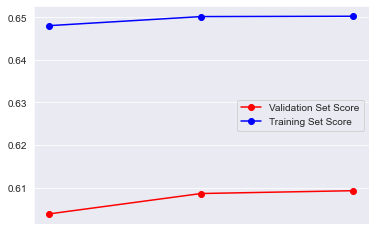

In [ ]:
sns.set_style("darkgrid")

plt.plot([x["val_score"] for x in Forest_history], 'r-o')
plt.plot([x["train_score"] for x in Forest_history], 'b-o')

plt.xticks([])

plt.legend(['Validation Set Score', 'Training Set Score'])

# Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def NaiveModelHyperParams(x, vector, **params):
    model = MultinomialNB(**params) #**params for tuning the MultinomialNB model
    model.fit(x, train_targets) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set
    Naive_history.append({"train_score":model.score(x, train_targets.values.ravel()), "val_score":model.score(valvector, val_targets.values.ravel())})
    return model

In [ ]:
def NaiveTuning():
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectorizer = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i))  #Displaying the round/epoch and the current parameters
    model = NaiveModelHyperParams(x = clean, vector = vectorizer)  #Setting the MultinomailNB model parameters
    counter += 1;
  return model, vectorizer

**Max_features in the TFIDF vectorizer seems to play a big part in the models predictions. Previous testing showed that tuning the RandomForestClassifier showed little to no difference in the accuracy of the model**

In [ ]:
%%time
Naive_history = []
model, vectorizer = NaiveTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.65346
Validation set score: 0.62367


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.66887
Validation set score: 0.63019


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.66938
Validation set score: 0.62165

CPU times: total: 2min 24s
Wall time: 2min 27s


Sample Predictions

In [ ]:
model

MultinomialNB()

In [ ]:
model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])), #Poltical headline

(array(['POLITICS'], dtype='<U19'),)

In [ ]:
model.predict(vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['LIFESTYLE'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['POLITICS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WORLD NEWS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

Here our model predicts a wrong category, lets try providing the description in the following line

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['WELLNESS'], dtype='<U19')

Still a wrong prediction, lets try combining both the headline and descripton

In [ ]:
model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

Still wrong, here we can see our model is not 100% accurate.

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

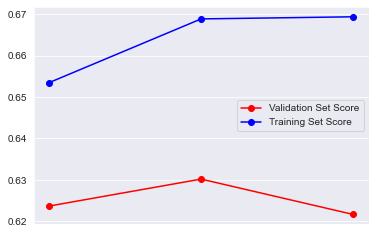

In [ ]:
sns.set_style("darkgrid")

plt.plot([x["val_score"] for x in Naive_history], 'r-o')
plt.plot([x["train_score"] for x in Naive_history], 'b-o')

plt.xticks([])

plt.legend(['Validation Set Score', 'Training Set Score'])

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
def SGDModelHyperParams(x, vector, **params):
    model = SGDClassifier(**params) #**params for tuning the SGD Classifier model
    model.fit(x, train_targets) #Fitting the model 
    print("Training set score: {:.5f}".format(model.score(x, train_targets.values.ravel()))) #Predictions for training set
    valvector = vector.transform(val_df.combined) #Transforming the validation data for predictions
    print("Validation set score: {:.5f}\n".format(model.score(valvector, val_targets.values.ravel()))) #Predictions for validation set
    SGD_history.append({"train_score":model.score(x, train_targets.values.ravel()), "val_score":model.score(valvector, val_targets.values.ravel())})
    return model

In [ ]:
def SGDTuning():
  range = increment(4000)
  counter = 1;
  for i in range:
    clean, vectorizer = hyperParams(lowercase=True, max_df=0.80, max_features= i, ngram_range=(1,3)) #Setting the parameters for TFIDF vectorizing
    print("\nRound {}: Max_features = {}".format(counter, i))  #Displaying the round/epoch and the current parameters
    model = SGDModelHyperParams(x = clean, vector = vectorizer ,n_jobs = -1, random_state=42, alpha = 0.0000095)  #Setting the SGD model parameters
    counter += 1
  return model, vectorizer

In [ ]:
%%time
SGD_history = []
model, vectorizer = SGDTuning()


Round 1: Max_features = 8000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.76930
Validation set score: 0.69004


Round 2: Max_features = 16000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.81675
Validation set score: 0.70679


Round 3: Max_features = 32000


C:\Users\Ethan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training set score: 0.85986
Validation set score: 0.71805

CPU times: total: 2min 55s
Wall time: 2min 38s


Sample Predictions

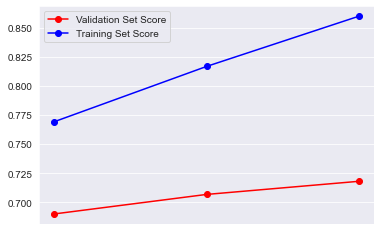

In [ ]:
sns.set_style("darkgrid")

plt.plot([x["val_score"] for x in SGD_history], 'r-o')
plt.plot([x["train_score"] for x in SGD_history], 'b-o')

plt.xticks([])

plt.legend(['Validation Set Score', 'Training Set Score'])

In [ ]:
model.predict(vectorizer.transform(["Texas sues Biden administration to stop mask mandates on planes – as it happened"])) #Poltical headline

array(['POLITICS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Google moves to make Android apps more private"])) #Tech headline

array(['TECH'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Googles plan to limit data tracking on its Chrome browser has been extended to cover apps on its Android-based smartphones."])) #Tech short description

array(['TECH'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(["Austria and Germany have both announced plans to relax Covid-19 measures, weeks after pushing for compulsory vaccinations to curb infections."])) #General/Covid News

array(['WELLNESS'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(['EUROPE Soldier abused for being gay told to provide intimate pictures to prove his sexuality'])) #Queer News

array(['QUEER VOICES'], dtype='<U19')

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children'])) #Parenting News

array(['PARENTS'], dtype='<U19')

With the short description of the previous headline the model predicts this as a Wellness category

In [ ]:
model.predict(vectorizer.transform(['A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

And with both headline and short description the model predicts this as a Wellness category

In [ ]:
model.predict(vectorizer.transform(['Five healthy ways to discipline children A positive disciplining strategy can help develop a positive relationship and set expectations based on the behavioral outcomes, says an expert.']))

array(['WELLNESS'], dtype='<U19')

# **Conclusion**
While the models are not 100% accurate, we can see that they perform better than a random descesion model. When given vague headlines the model still manages to predict a category which is close to the correct category. When given a clearer headline or short description the model performs execptionally well. With some more tuning and testing of different models I am sure the predictions could be better. Another thing to keep in mind is that some news categories are subjective, what one person may say is entertainment another could say lifestyle.

#References: 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier

https://plotly.com/python/

https://www.youtube.com/watch?v=i74DVqMsRWY

https://numpy.org/doc/stable/reference/index.html

